In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import pandas_datareader
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr
import alpha_vantage as av
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tensor

In [33]:
stocks = pd.read_csv('data_stocks.csv')

In [34]:
stocks.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [35]:
stocks = stocks.drop(['DATE'], 1)
n = stocks.shape[0]
p = stocks.shape[1]
stocks = stocks.values

In [37]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = stocks[np.arange(train_start, train_end), :]
data_test = stocks[np.arange(test_start, test_end), :]

In [38]:
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
train_x = data_train[:, 1:]
train_y = data_train[:, 0]
test_x = data_test[:, 1:]
test_y = data_test[:, 0]

In [42]:
ph1 = tensor.placeholder(dtype=tf.int8)
ph2 = tensor.placeholder(dtype=tf.int8)
ph3 = tensor.add(ph1, ph2)
graph = tensor.Session()
graph.run(ph3, feed_dict={ph1: 5, ph2: 4})

9

In [43]:
x = tensor.placeholder(dtype=tf.float32, shape=[None, 500])
Y = tensor.placeholder(dtype=tf.float32, shape=[None])

In [58]:
stocks = 500
neuronas_1 = 1024
neuronas_2 = 512
neuronas_3 = 256
neuronas_4 = 128
target = 1


In [59]:
weight_initializer = tensor.truncated_normal_initializer(stddev=0.1)
bias_initializer = tensor.truncated_normal_initializer(stddev=0.1)




In [60]:
W_hidden_1 = tensor.Variable(weight_initializer([stocks, neuronas_1]))
bias_hidden_1 = tensor.Variable(bias_initializer([neuronas_1]))



In [61]:
W_hidden_2 = tensor.Variable(weight_initializer([neuronas_1, neuronas_2]))
bias_hidden_2 = tensor.Variable(bias_initializer([neuronas_2]))

In [62]:
W_hidden_3 = tensor.Variable(weight_initializer([neuronas_2, neuronas_3]))
bias_hidden_3 = tensor.Variable(bias_initializer([neuronas_3]))
W_hidden_4 = tensor.Variable(weight_initializer([neuronas_3, neuronas_4]))
bias_hidden_4 = tensor.Variable(bias_initializer([neuronas_4]))
W_out = tensor.Variable(weight_initializer([neuronas_4, target]))
bias_out = tensor.Variable(bias_initializer([target]))

In [63]:
hidden_1 = tensor.nn.relu(tensor.add(tensor.matmul(x, W_hidden_1), bias_hidden_1))
hidden_2 = tensor.nn.relu(tensor.add(tensor.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tensor.nn.relu(tensor.add(tensor.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tensor.nn.relu(tensor.add(tensor.matmul(hidden_3, W_hidden_4), bias_hidden_4))
out = tensor.transpose(tensor.add(tensor.matmul(hidden_4, W_out), bias_out))


In [66]:
mse = tensor.reduce_mean(tensor.squared_difference(out, Y))
opt = tensor.train.AdamOptimizer().minimize(mse)

In [67]:
sigma = 1
weight_initializer = tensor.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tensor.zeros_initializer()

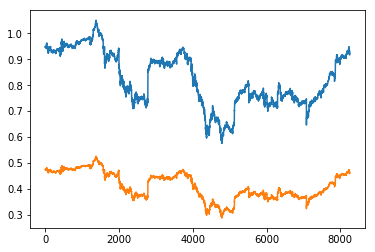

In [92]:
inicio = tensor.Session()
inicio.run(tensor.global_variables_initializer())

plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(test_y)
line2, = ax1.plot(test_y*0.5)
plt.show()

epochs = 10
batch_size = 256



In [97]:
for e in range(epochs):

    shuffle_indices = np.random.permutation(np.arange(len(train_y)))
    train_x = train_x[shuffle_indices]
    train_y = train_y[shuffle_indices]
    
    for i in range(0, len(train_y) // batch_size):
        start = i * batch_size
        batch_x = train_x[start:start + batch_size]
        batch_y = train_y[start:start + batch_size]
        inicio.run(opt, feed_dict={x: batch_x, Y: batch_y})

        
        if np.mod(i, 5) == 0:
            pred = inicio.run(out, feed_dict={x: test_x})
            line2.set_ydata(pred)
            
            
mse_final = inicio.run(mse, feed_dict={x: test_x, Y: test_y})
print(mse_final)


0.0044898633
